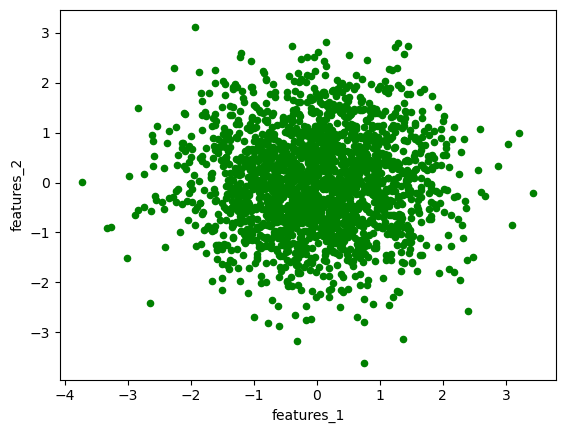

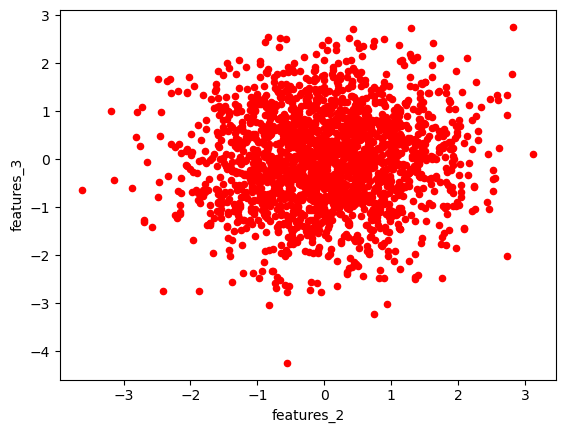

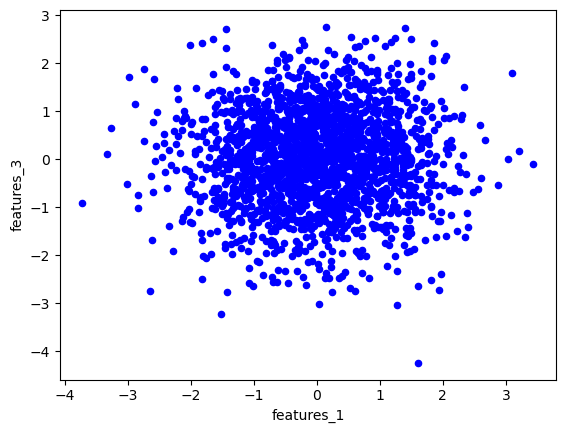

In [1]:
##ex07
##q1
import numpy as np
import pandas as pd
df=pd.read_csv('data/regression_generated.csv')
df
data= df.loc[:, ['features_1', 'features_2','features_3']]
features_1=data['features_1']
features_2=data['features_2']
features_3=data['features_3']
###plotting the scatterplot
ax = df.plot.scatter(x='features_1',y='features_2', c='green')
ax = df.plot.scatter(x='features_2',y='features_3', c='red')
ax = df.plot.scatter(x='features_1',y='features_3',  c='blue')

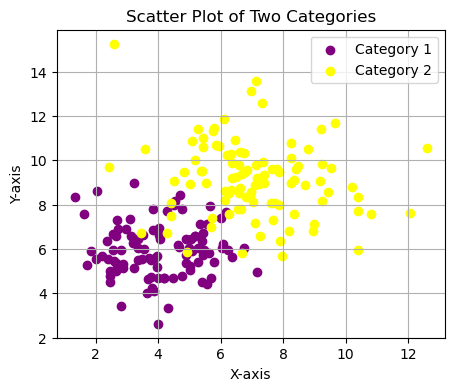

In [2]:
##q2
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_gaussian(mean, std_dev, num_samples):
    return np.random.normal(mean, std_dev, (num_samples, 2))

# Generating data for two categories with different means and standard deviations
np.random.seed(60)  

# parameters 1: mean=[4, 6], std_dev=1.2
category1_data = generate_2d_gaussian([4, 6], 1.2, 100)

# parameters 2: mean=[7, 9], std_dev=1.7
category2_data = generate_2d_gaussian([7, 9], 1.7, 100)

# Scatter plot for the generated dataset
plt.figure(figsize=(5,4))

# Scatter plot for category 1 (purple color)
plt.scatter(category1_data[:, 0], category1_data[:, 1], color='purple', label='Category 1')

# Scatter plot for category 2 (yellow color)
plt.scatter(category2_data[:, 0], category2_data[:, 1], color='yellow', label='Category 2')

# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Two Categories')
plt.legend()

plt.grid(True)
plt.show()

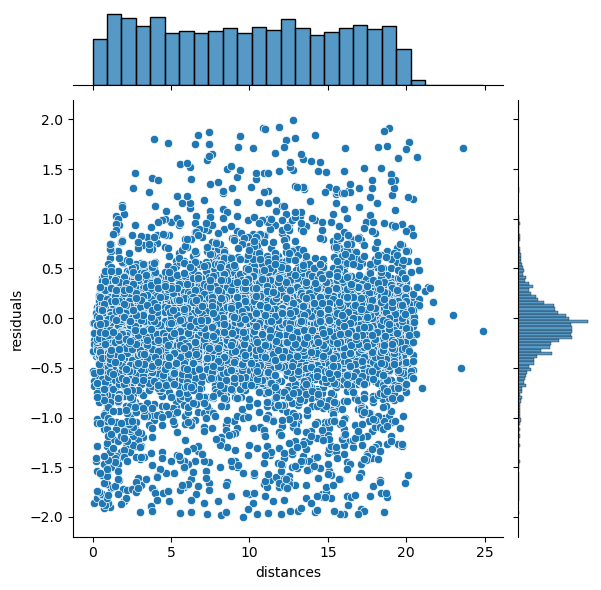

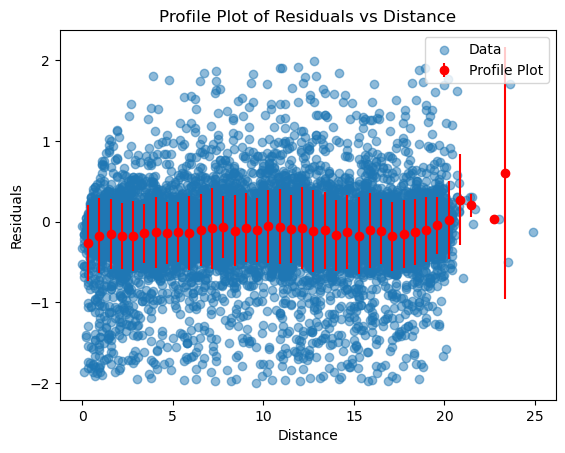

In [3]:
##q3
#Part A
import pandas as pd 
import numpy as np
import pickle
import seaborn as sns

with open("data/residuals_261.pkl", "rb") as f:
    data = pickle.load(f)

#converting d to list    
d=data.tolist()
# converting d to dataframe 
df =pd.DataFrame(d)
#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
res=np.abs(df['residuals']) < 2

df_filtered=df[res]
df_filtered
# Plot jointplot with linear regression
sns.jointplot(x='distances', y='residuals', data=df_filtered)
plt.show()

#Part B
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# Load data from the pickle file into a DataFrame
with open("data/residuals_261.pkl", "rb") as f:
    data = pickle.load(f)
    
d=data.tolist()
# converting d to dataframe 
df =pd.DataFrame(d)
#Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
res=np.abs(df['residuals']) < 2
# Filter entries where absolute values of 'residuals' are smaller than 2
df_filtered = df[abs(df['residuals']) < 2]

# Manual profile histogram for the 'distance' variable
# variable number of bins
num_bins =40  
hist, bin_edges = np.histogram(df_filtered['distances'], bins=num_bins)
x = (bin_edges[1:] + bin_edges[:-1]) / 2 
    
# Calculate mean values and standard deviations of 'residuals' in each bin
y = [df_filtered[(df_filtered['distances'] >= bin_edges[i]) & (df_filtered['distances'] < bin_edges[i+1])]['residuals'].mean() for i in range(len(bin_edges)-1)]
err_y = [df_filtered[(df_filtered['distances'] >= bin_edges[i]) & (df_filtered['distances'] < bin_edges[i+1])]['residuals'].std() for i in range(len(bin_edges)-1)]
    
# Plot scatter plot of 'distances' against 'residuals'
plt.scatter(df_filtered['distances'], df_filtered['residuals'], alpha=0.5, label='Data')

# Plot profile plot on top of the scatter plot
plt.errorbar(x, y, yerr=err_y, fmt='o', color='red', label='Profile Plot')
    
# Set labels and title
plt.xlabel('Distance')
plt.ylabel('Residuals')
plt.title('Profile Plot of Residuals vs Distance')
plt.legend()
    
plt.show()


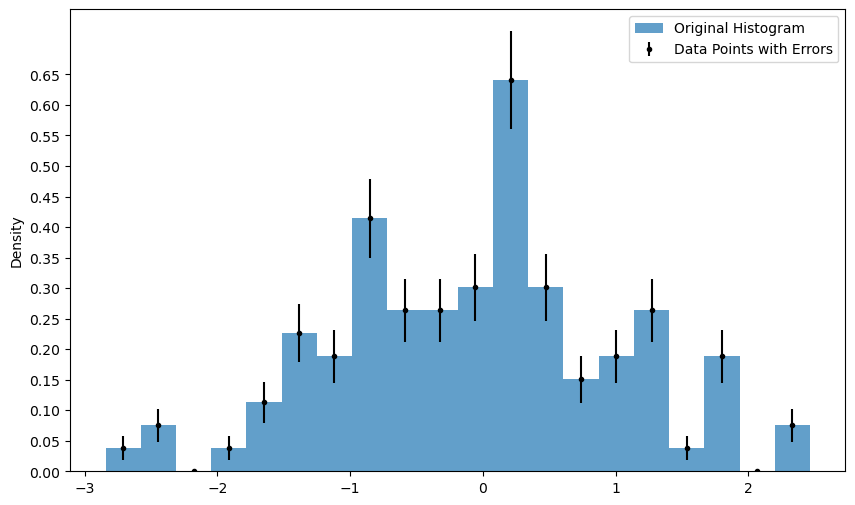

NameError: name 'x_values' is not defined

In [4]:
##q4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm
from scipy.integrate import trapz

mean = 0
std_dev = 1
N = 100

x = np.random.normal(mean, std_dev, N)
plt.figure(figsize=(10, 6))

hist, edges, _ = plt.hist(x, bins=20, alpha=0.7, label='Original Histogram', density=True)
plt.ylabel('Density')
plt.yticks(np.arange(0, max(hist) + 0.05, step=0.05))

bin_centers = 0.5 * (edges[:-1] + edges[1:])
errors = np.sqrt(hist * N) / N 
plt.errorbar(bin_centers, hist, yerr=errors, fmt='.', color='black', label='Data Points with Errors')
plt.legend()
plt.show()

# Standard deviation parameter for Gaussian functions
gaussian_std_dev = 1.06 * x.std() * x.size ** (-1 / 5)
gaussians = [norm.pdf(x_values, loc=xi, scale=gaussian_std_dev) for xi in x]

# plot for gaussian functions
plt.figure(figsize=(10, 6))
plt.title('Gaussian Functions')

for gaussian in gaussians:
    plt.plot(x_values, gaussian, color='gray', alpha=0.1)
plt.show()

# Suming and normalizing
sum_gaussians = np.sum(gaussians, axis=0)
integral_original = trapz(hist, bin_centers)
integral_sum_gaussians = trapz(sum_gaussians, x_values)
normalized_sum_gaussians = sum_gaussians * (integral_original / integral_sum_gaussians)

plt.figure(figsize=(10, 6))
plt.title('Original Histogram with Sum of Gaussians')
plt.hist(x, bins=20, alpha=0.3, density=True, color='blue', label='Original Histogram')
plt.plot(x_values, normalized_sum_gaussians, color='red', label='Sum of Gaussians')

plt.ylabel('Density')
plt.legend()
plt.show()